## 神经网络+词向量+TfIdf
- 时间复杂度：高
- 空间复杂度：中

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_word2vec_tfidf import load_xy, size
from b_metrics import metric, Timer
%matplotlib inline
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.callbacks import EarlyStopping
from tensorflow.python.keras.utils import to_categorical
from numpy import argmax

## 配置

In [2]:
maxlen = 200  # 序列长度
output_dim = size  # 词向量维度
batch_size = 512
epochs = 99
verbose = 2
patience = 1  # 没有进步的训练轮数
callbacks = [EarlyStopping('val_acc', patience=patience)]
validation_split = .05

## 数据读取、预处理

In [3]:
X_train, X_test, y_train, y_test = load_xy(1)
X_train = pad_sequences(X_train, maxlen, dtype='float')
X_test = pad_sequences(X_test, maxlen, dtype='float')
y_train = to_categorical(y_train, 9)
y_test = to_categorical(y_test, 9)

### CNN

In [4]:
from tensorflow.python.keras.layers import Conv1D, MaxPool1D, GlobalMaxPool1D
filters = 50  # 卷积滤波器数量
kernel_size = 10  # 卷积层滤波器大小
model = Sequential(name='CNN')
model.add(Conv1D(filters, kernel_size * 2, padding='same', activation='relu', input_shape=(maxlen, size)))
model.add(MaxPool1D(pool_size=2))  # strides默认等于pool_size
model.add(Conv1D(filters * 2, kernel_size, padding='same', activation='relu'))
model.add(GlobalMaxPool1D())  # 对于时序数据的全局最大池化
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 200, 50)           100050    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 100, 50)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 100)          50100     
_________________________________________________________________
global_max_pooling1d (Global (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 9)                 909       
Total params: 151,059
Trainable params: 151,059
Non-trainable params: 0
_________________________________________________________________


In [5]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13305 samples, validate on 701 samples
Epoch 1/99
13305/13305 - 29s - loss: 2.7153 - acc: 0.5952 - val_loss: 0.9134 - val_acc: 0.7318
Epoch 2/99
13305/13305 - 27s - loss: 0.6876 - acc: 0.7723 - val_loss: 0.7230 - val_acc: 0.7703
Epoch 3/99
13305/13305 - 28s - loss: 0.5267 - acc: 0.8170 - val_loss: 0.6719 - val_acc: 0.7917
Epoch 4/99
13305/13305 - 27s - loss: 0.4288 - acc: 0.8565 - val_loss: 0.6524 - val_acc: 0.7860
1.88分钟


                precision    recall  f1-score   support

          car_       0.94      0.93      0.94       373
    education_       0.82      0.83      0.82       370
entertainment_       0.75      0.80      0.77       383
      fashion_       0.75      0.78      0.76       390
      finance_       0.78      0.75      0.76       414
     military_       0.80      0.71      0.76       411
     politics_       0.62      0.69      0.65       379
      science_       0.76      0.73      0.74       386
       sports_       0.97      0.95      0.96       398

     micro avg       0.80      0.80      0.80      3504
     macro avg       0.80      0.80      0.80      3504
  weighted avg       0.80      0.80      0.80      3504



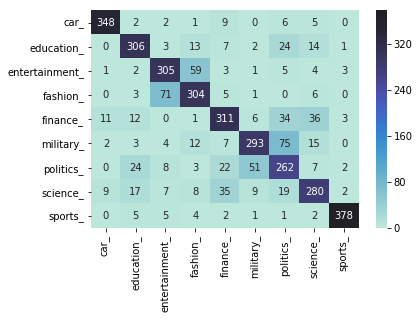

In [6]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))

### GRU

In [7]:
from tensorflow.python.keras.layers import GRU
units = 100  # RNN神经元数量
model = Sequential(name='GRU')
model.add(GRU(units, input_shape=(maxlen, size)))
model.add(Dense(9, activation='softmax'))
model.summary()

Model: "GRU"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100)               60300     
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 909       
Total params: 61,209
Trainable params: 61,209
Non-trainable params: 0
_________________________________________________________________


In [8]:
t = Timer()
model.compile('adam', 'categorical_crossentropy', ['acc'])
model.fit(X_train, y_train, batch_size, epochs, verbose, callbacks, validation_split)
del t

Train on 13305 samples, validate on 701 samples
Epoch 1/99
13305/13305 - 113s - loss: 1.6564 - acc: 0.4268 - val_loss: 1.1823 - val_acc: 0.6020
Epoch 2/99
13305/13305 - 112s - loss: 1.0536 - acc: 0.6399 - val_loss: 0.9701 - val_acc: 0.6805
Epoch 3/99
13305/13305 - 111s - loss: 0.8407 - acc: 0.7149 - val_loss: 0.8258 - val_acc: 0.7247
Epoch 4/99
13305/13305 - 112s - loss: 0.6971 - acc: 0.7635 - val_loss: 0.7293 - val_acc: 0.7461
Epoch 5/99
13305/13305 - 112s - loss: 0.5990 - acc: 0.7974 - val_loss: 0.6705 - val_acc: 0.7718
Epoch 6/99
13305/13305 - 114s - loss: 0.5333 - acc: 0.8186 - val_loss: 0.6437 - val_acc: 0.7775
Epoch 7/99
13305/13305 - 115s - loss: 0.4833 - acc: 0.8337 - val_loss: 0.6140 - val_acc: 0.7889
Epoch 8/99
13305/13305 - 113s - loss: 0.4422 - acc: 0.8496 - val_loss: 0.5877 - val_acc: 0.7917
Epoch 9/99
13305/13305 - 114s - loss: 0.4078 - acc: 0.8624 - val_loss: 0.5752 - val_acc: 0.7917
16.96分钟


                precision    recall  f1-score   support

          car_       0.94      0.92      0.93       373
    education_       0.87      0.85      0.86       370
entertainment_       0.76      0.78      0.77       383
      fashion_       0.76      0.80      0.78       390
      finance_       0.82      0.78      0.80       414
     military_       0.84      0.78      0.81       411
     politics_       0.63      0.68      0.65       379
      science_       0.78      0.80      0.79       386
       sports_       0.95      0.94      0.95       398

     micro avg       0.81      0.81      0.81      3504
     macro avg       0.82      0.81      0.82      3504
  weighted avg       0.82      0.81      0.82      3504



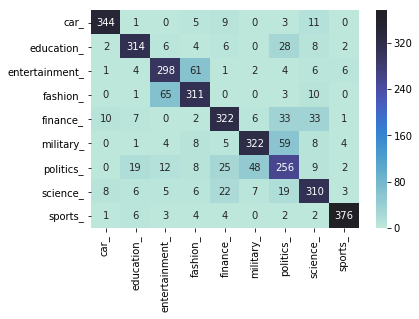

In [9]:
y_pred = model.predict(X_test)
metric(argmax(y_test, axis=1), argmax(y_pred, axis=1))